## IMPORT LIBRARY

In [2]:
#Import Libraries
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os
import pandas as pd

## IMPORTING DATASET

In [3]:
os.chdir('C:/Users/shilp/Desktop/Nmims/Project/Sem2/REGRESSION/Cart_Abandonment-master')
dataset = pd.read_csv('data_cart_abandonment.csv')


In [4]:
dataset.head(3)

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0


In [5]:
dataset.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [7]:
dataset.shape

(4284, 13)

In [8]:
dataset.describe()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


In [6]:
dataset.Cart_Abandoned=pd.Categorical(dataset.Cart_Abandoned)
dataset.Cart_Abandoned.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [7]:
dataset.Customer_Segment_Type=pd.Categorical(dataset.Customer_Segment_Type)

In [8]:
dataset.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                float64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

## EXPLORATORY DATA ANALYSIS

#### UNIVARIATE

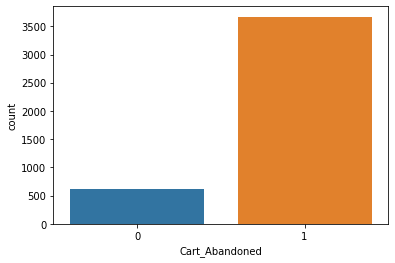

In [9]:
sns.countplot(dataset.Cart_Abandoned)

In [11]:
num=dataset.select_dtypes(include=["float64","int64"])
cat=dataset.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [12]:
num.shape

(4284, 9)

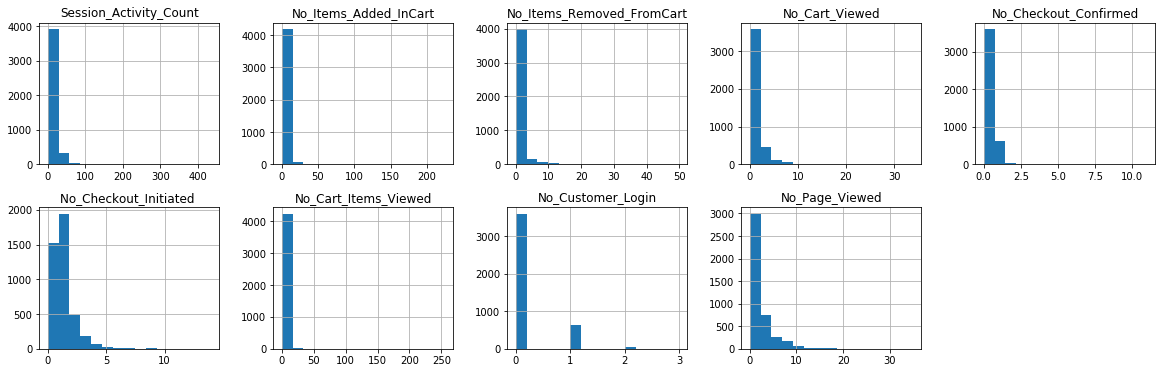

In [13]:
num.hist(bins=15, figsize=(20, 6), layout=(2, 5));

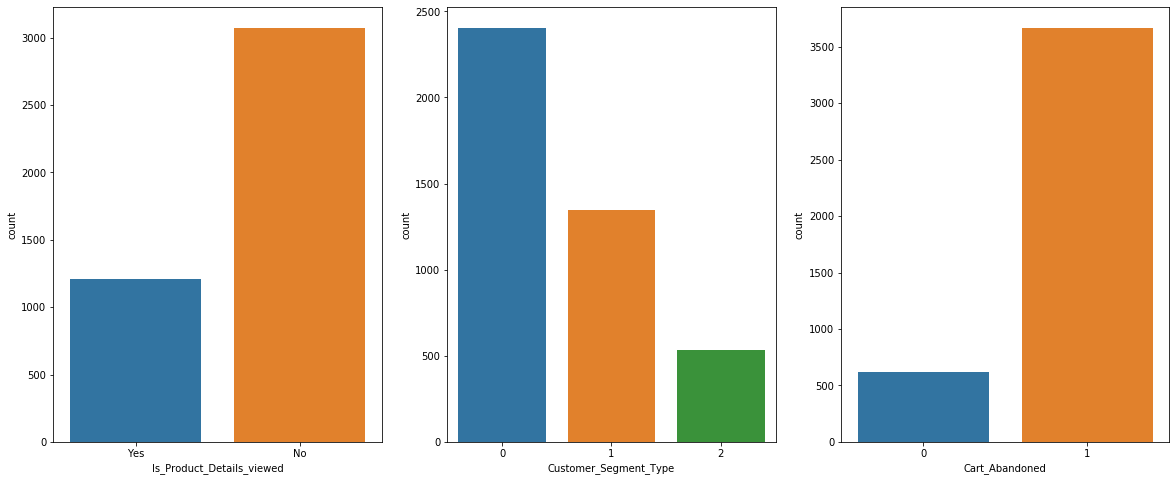

In [14]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

#### BIVARIATE

1.FOR CATEGORICAL :Is_Product_Details_viewed Vrs Cart_Abandoned
Part 1 : If a customer is viewing the product details then what is the chance that he is doing cart abandonment?

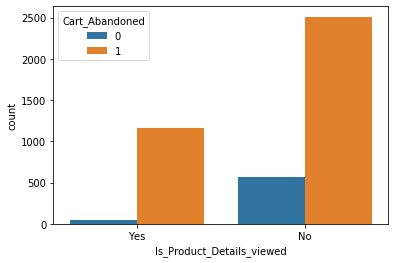

In [15]:
sns.countplot(x=dataset.Is_Product_Details_viewed,hue=dataset.Cart_Abandoned)

2.1 FOR NUMERICAL : Numerical Attributes Vrs Cart_Abandoned : By BoxPlot

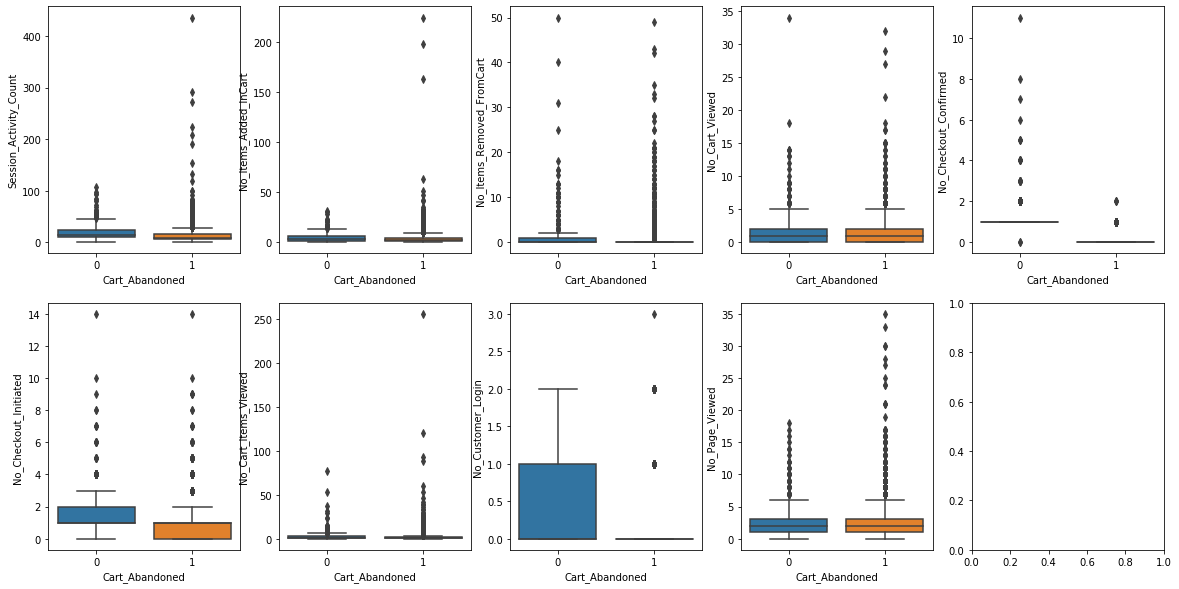

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=cat["Cart_Abandoned"], y=num[var], ax=subplot)

2.2 Correlation plot of Independent attributes


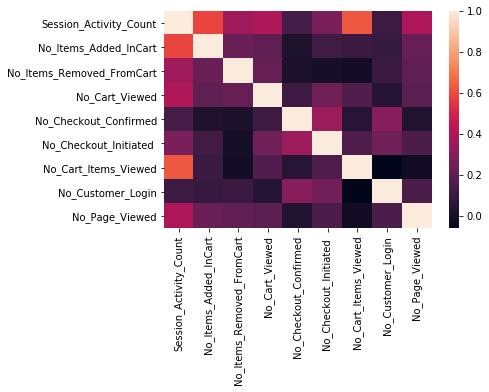

In [17]:
corr = num.corr()
sns.heatmap(corr)

## DATA PREPARATION

imputing missing values wherever needed

In [63]:
data = dataset.copy()
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [64]:
null_col = data.columns[data.isna().any()].tolist()
null_col

['No_Items_Added_InCart', 'No_Cart_Viewed']

In [65]:
data['No_Cart_Viewed'].mean()
data['No_Items_Added_InCart'].mean()

data['No_Items_Added_InCart'].fillna(3.48,inplace=True)
data['No_Cart_Viewed'].fillna(1.44,inplace=True)


In [66]:
data[null_col] = data[null_col].astype("int64")

In [67]:
data.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart           int64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                  int64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

1.Taking care of Outliers by Normalizing the Data : By MinMax Normalization

In [68]:
num=data.select_dtypes(include=["int64"])
cat=data.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [69]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
x_scaled

array([[0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.08715596, 0.        , 0.        , ..., 0.0078125 , 0.        ,
        0.05714286],
       [0.01834862, 0.02222222, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       ...,
       [0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.01834862, 0.01333333, 0.        , ..., 0.00390625, 0.        ,
        0.05714286],
       [0.07110092, 0.01777778, 0.        , ..., 0.02734375, 0.        ,
        0.02857143]])

In [70]:
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head(3)

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,0.009174,0.004444,0.0,0.000000,0.000000,0.000000,0.003906,0.0,0.000000
1,0.087156,0.000000,0.0,0.058824,0.000000,0.000000,0.007812,0.0,0.057143
2,0.018349,0.022222,0.0,0.000000,0.090909,0.071429,0.003906,0.0,0.000000


In [71]:
df_scaled.dtypes

Session_Activity_Count       float64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart    float64
No_Cart_Viewed               float64
No_Checkout_Confirmed        float64
No_Checkout_Initiated        float64
No_Cart_Items_Viewed         float64
No_Customer_Login            float64
No_Page_Viewed               float64
dtype: object

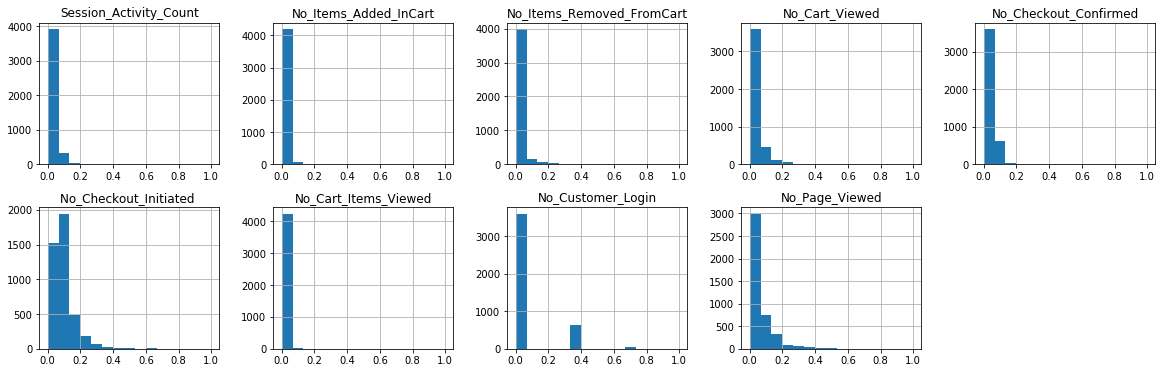

In [72]:
df_scaled.hist(bins=15, figsize=(20, 6), layout=(2, 5));


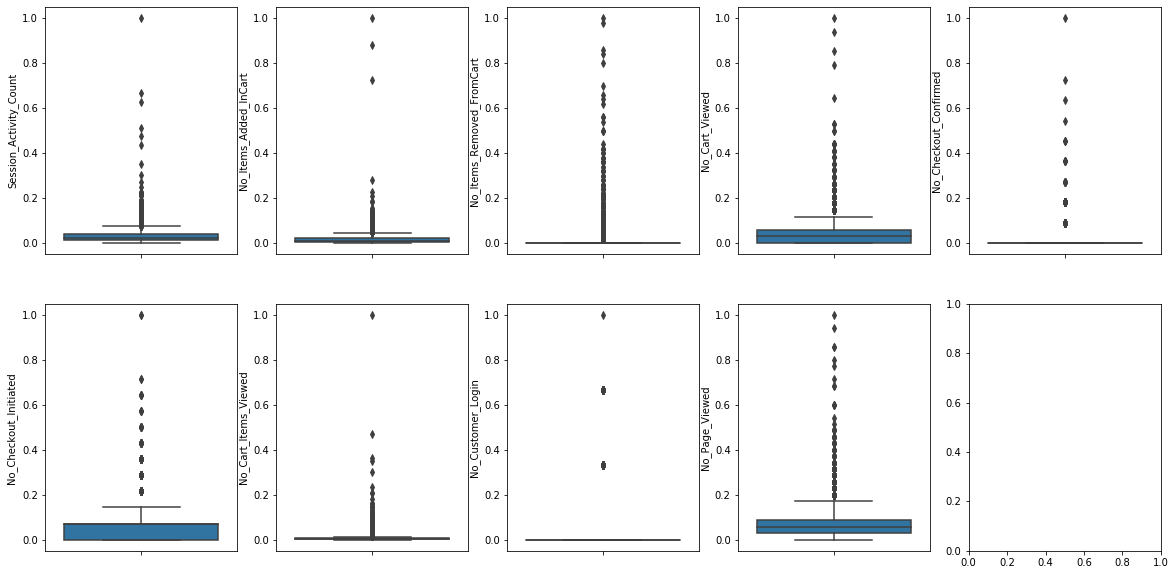

In [73]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled[var], ax=subplot)

2.Taking care of Outliers by Normalizing the Data : By BoxCox Normalization

In [74]:
df_scaled_boxcox=boxcox1p(num, 0)

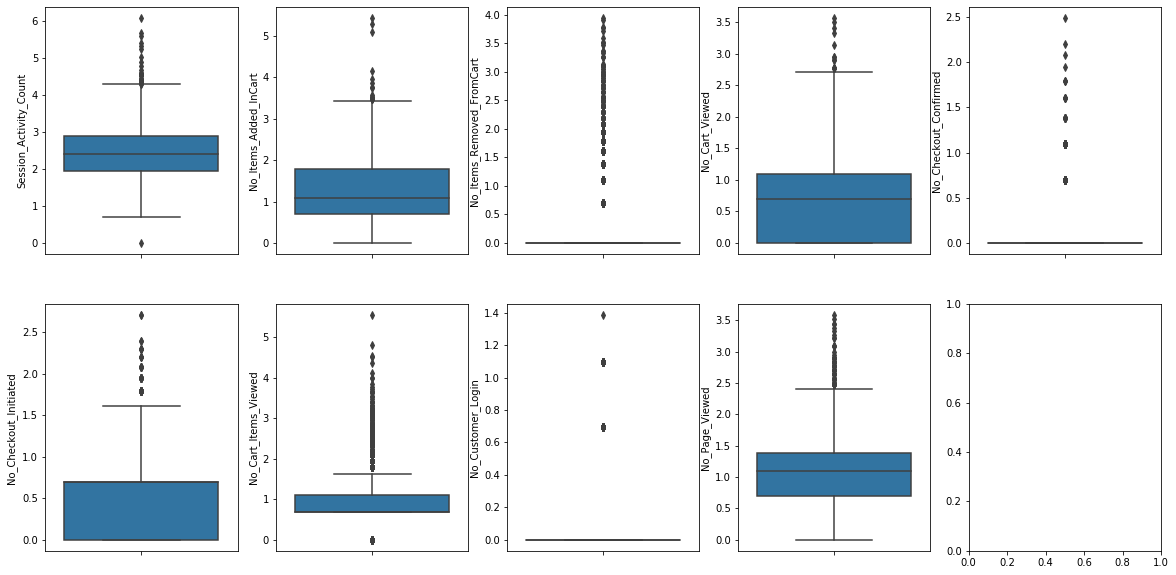

In [75]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled_boxcox.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled_boxcox[var], ax=subplot)

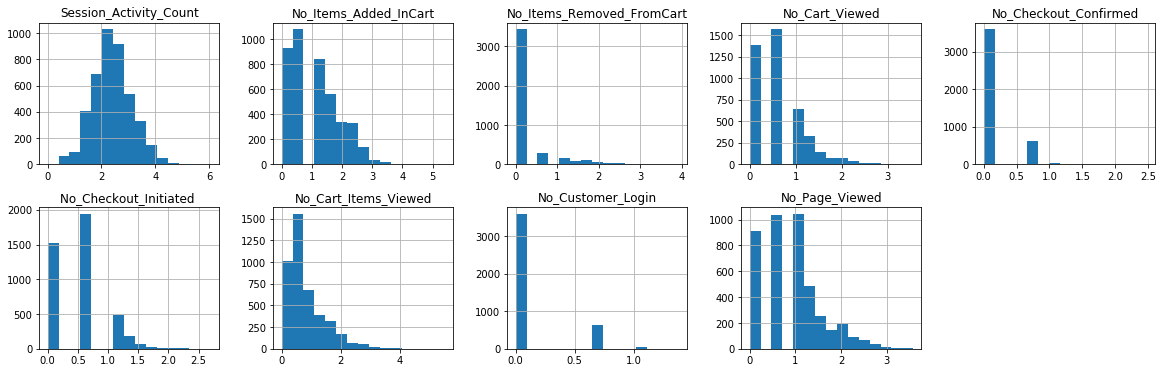

In [76]:
df_scaled_boxcox.hist(bins=15, figsize=(20, 6), layout=(2, 5));

In [77]:
df_scaled_boxcox.head(3)

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000
1,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612
2,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000


In [78]:
df_scaled_boxcox.dtypes


Session_Activity_Count       float64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart    float64
No_Cart_Viewed               float64
No_Checkout_Confirmed        float64
No_Checkout_Initiated        float64
No_Cart_Items_Viewed         float64
No_Customer_Login            float64
No_Page_Viewed               float64
dtype: object

In [79]:
df_scaled_boxcox["ID"]=data.ID
df_scaled_boxcox.set_index('ID',inplace=True)
df_scaled_boxcox.reset_index(inplace=True)


In [80]:
df_final=df_scaled_boxcox.join(cat)
df_final.head(3)


,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,Yes,0,1
1,Session_ID_1,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612,No,0,1
2,Session_ID_2,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000,No,1,0


In [81]:
df_final.Is_Product_Details_viewed.replace({"Yes":1,"No":0},inplace=True)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,1,0,1
1,Session_ID_1,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612,0,0,1
2,Session_ID_2,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000,0,1,0


In [82]:
df_final.dtypes

ID                             object
Session_Activity_Count        float64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart     float64
No_Cart_Viewed                float64
No_Checkout_Confirmed         float64
No_Checkout_Initiated         float64
No_Cart_Items_Viewed          float64
No_Customer_Login             float64
No_Page_Viewed                float64
Is_Product_Details_viewed       int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

In [83]:
df_final.Is_Product_Details_viewed=pd.Categorical(df_final.Is_Product_Details_viewed)

## FEATURE SELECTION

1. By RFE


In [84]:
X=df_final.iloc[:,1:12]
X.shape


(4284, 11)

In [85]:
y=df_final["Cart_Abandoned"]
y.name

'Cart_Abandoned'

In [86]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [87]:
rfe = RFE(lr, n_features_to_select=5, verbose = 3 )
fit=rfe.fit(X,y)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [88]:
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)


Num Features: 5
Selected Features: [False False False False  True  True False  True  True  True False]
Feature Ranking: [2 4 6 3 1 1 7 1 1 1 5]


In [89]:
l = [i for i,x in enumerate(list(fit.support_)) if x == True]


In [90]:
X.columns

Index(['Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type'],
      dtype='object')

In [91]:
feature_selected = [X[X.columns[l[i]]].name for i,x in enumerate(l)]
feature_selected

['No_Checkout_Confirmed',
 'No_Checkout_Initiated ',
 'No_Customer_Login',
 'No_Page_Viewed',
 'Is_Product_Details_viewed']

Part 2: What are the important factors related to cart abandonment?

2.By Random Forest Classifier
Create a random forest classifier

In [92]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

 Train the classifier

In [93]:
clf.fit(X, y)
feature_weightage_dict = dict()
# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    feature_weightage_dict.update({feature[0]:feature[1]})
feature_weightage_dict


{'Session_Activity_Count': 0.05052857005529642,
 'No_Items_Added_InCart': 0.025547984898027527,
 'No_Items_Removed_FromCart': 0.010172300692196705,
 'No_Cart_Viewed': 0.017810335296951977,
 'No_Checkout_Confirmed': 0.7341868777064404,
 'No_Checkout_Initiated ': 0.0441808380652188,
 'No_Cart_Items_Viewed': 0.018703955749515146,
 'No_Customer_Login': 0.05604221107820115,
 'No_Page_Viewed': 0.027120211503535017,
 'Is_Product_Details_viewed': 0.009764913736069736,
 'Customer_Segment_Type': 0.0059418012185472185}

In [94]:
sorted_feature_weightage_dict = sorted(feature_weightage_dict.items(), key=lambda kv: kv[1], reverse = True)
sorted_feature_weightage_dict

[('No_Checkout_Confirmed', 0.7341868777064404),
 ('No_Customer_Login', 0.05604221107820115),
 ('Session_Activity_Count', 0.05052857005529642),
 ('No_Checkout_Initiated ', 0.0441808380652188),
 ('No_Page_Viewed', 0.027120211503535017),
 ('No_Items_Added_InCart', 0.025547984898027527),
 ('No_Cart_Items_Viewed', 0.018703955749515146),
 ('No_Cart_Viewed', 0.017810335296951977),
 ('No_Items_Removed_FromCart', 0.010172300692196705),
 ('Is_Product_Details_viewed', 0.009764913736069736),
 ('Customer_Segment_Type', 0.0059418012185472185)]

In [95]:
df_final.columns

Index(['ID', 'Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type',
       'Cart_Abandoned'],
      dtype='object')

In [96]:
X = df_final.iloc[:,[5,6,8,9,2]]
y = df_final.loc[:,["Cart_Abandoned"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)


## OVER-SAMPLING USING SMOTE

In [97]:
sm = SMOTE(random_state=2,k_neighbors=5)
X_train, y_train =sm.fit_resample(X_train,y_train)

Train-Validation Split after SMOTE

In [98]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.40, random_state=0)

## MODEL BUILDING AND PREDICTION

In [99]:
lr1 = LogisticRegression()
lr1.fit(X_train_new,y_train_new)

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [100]:
y_pred_new = lr1.predict(X_test_new)  #### For SMOTE validation samples
y_pred=lr1.predict(X_test)##### For actual validation samples

## MODEL EVALUATION

In [101]:
print(" accuracy is %2.3f" % accuracy_score(y_test_new, y_pred_new))
print(" Kappa is %f" %cohen_kappa_score(y_test_new, y_pred_new))

 accuracy is 0.988
 Kappa is 0.976122


In [102]:
print(" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(" Kappa is %f" %cohen_kappa_score(y_test, y_pred))

 accuracy is 0.984
 Kappa is 0.936154


In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix( y_test_new ,y_pred_new ))
print(accuracy_score( y_test_new ,y_pred_new ))
print(classification_report( y_test_new ,y_pred_new ))

[[880   1]
 [ 20 858]]
0.9880613985218875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       1.00      0.98      0.99       878

    accuracy                           0.99      1759
   macro avg       0.99      0.99      0.99      1759
weighted avg       0.99      0.99      0.99      1759

